In [122]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [123]:
# Load the Dataset
df=pd.read_csv("D:\Edu Foundation\loan_data.csv")
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
C:\Users\sruja\AppData\Local\Temp\ipykernel_15916\1263377344.py:2: SyntaxWarning: invalid escape sequence '\E'
  df=pd.read_csv("D:\Edu Foundation\loan_data.csv")


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [124]:
# Check Shape and Data type
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [125]:
#Count missing values for each column
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [126]:
# convert person_age to Integer Type

df['person_age']=df['person_age'].astype('int')
df['person_age'].dtype

dtype('int32')

In [127]:
#Separating Numerical and Categorical Columns
categorical_cols=[var for var in df.columns if df[var].dtype == object ]
numeric_cols=[var for var in df.columns if df[var].dtype != object]
numeric_cols, categorical_cols

(['person_age',
  'person_income',
  'person_emp_exp',
  'loan_amnt',
  'loan_int_rate',
  'loan_percent_income',
  'cb_person_cred_hist_length',
  'credit_score',
  'loan_status'],
 ['person_gender',
  'person_education',
  'person_home_ownership',
  'loan_intent',
  'previous_loan_defaults_on_file'])

 Plotting Categorical Column Distributions


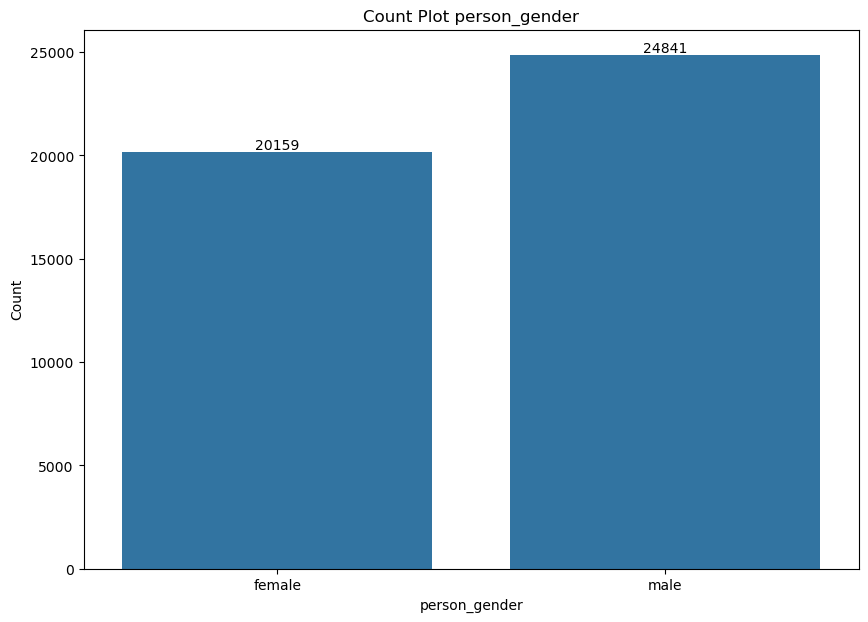

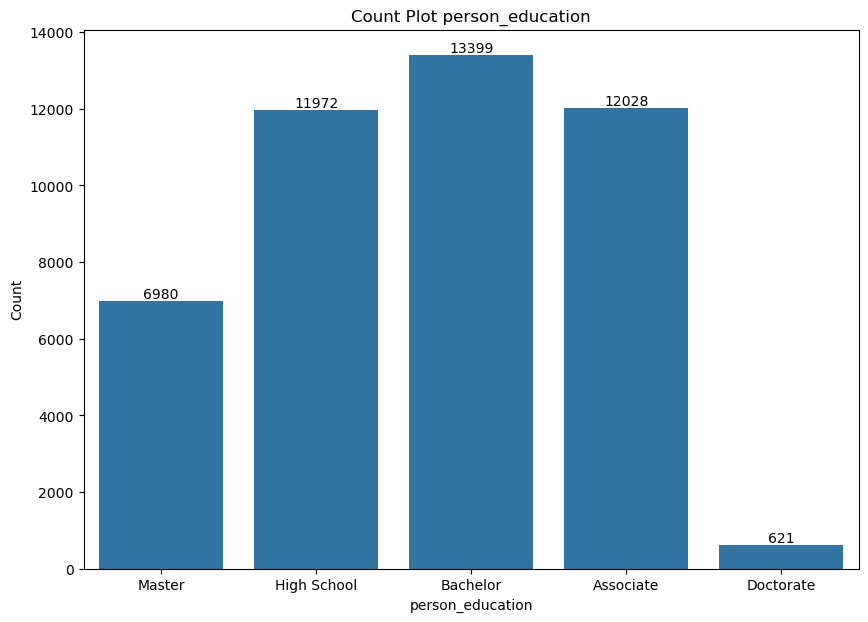

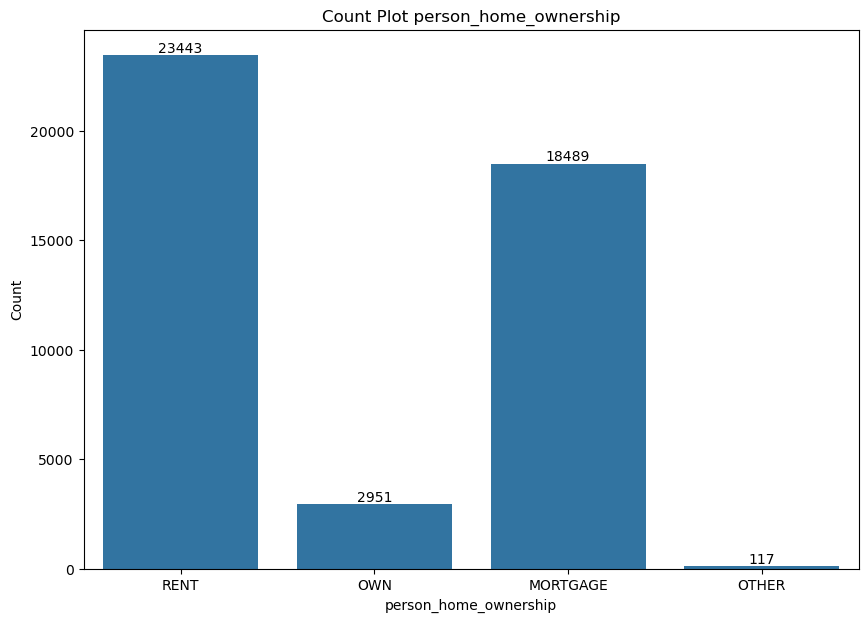

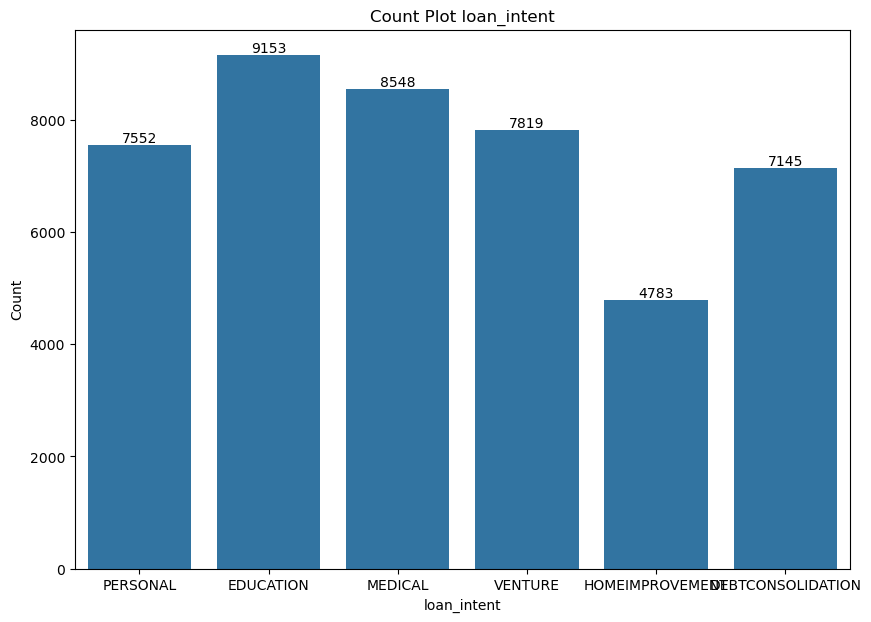

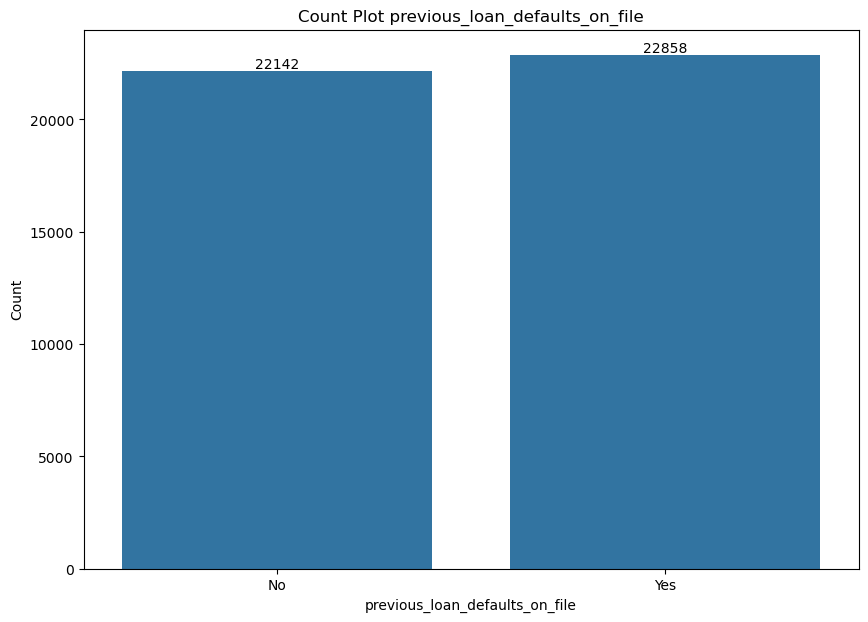

In [128]:
def plot_categorical_col(df,column):

    #set figure size
    plt.figure(figsize=(10,7))

    #  Creating Count Plot
    ax=sns.countplot(x=df[column])
    for bar in ax.containers:
        ax.bar_label(bar, fmt='%d')

    plt.title(f'Count Plot {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


for col in categorical_cols:
    plot_categorical_col(df,col)

Plotting Histograms of Numerical Columns

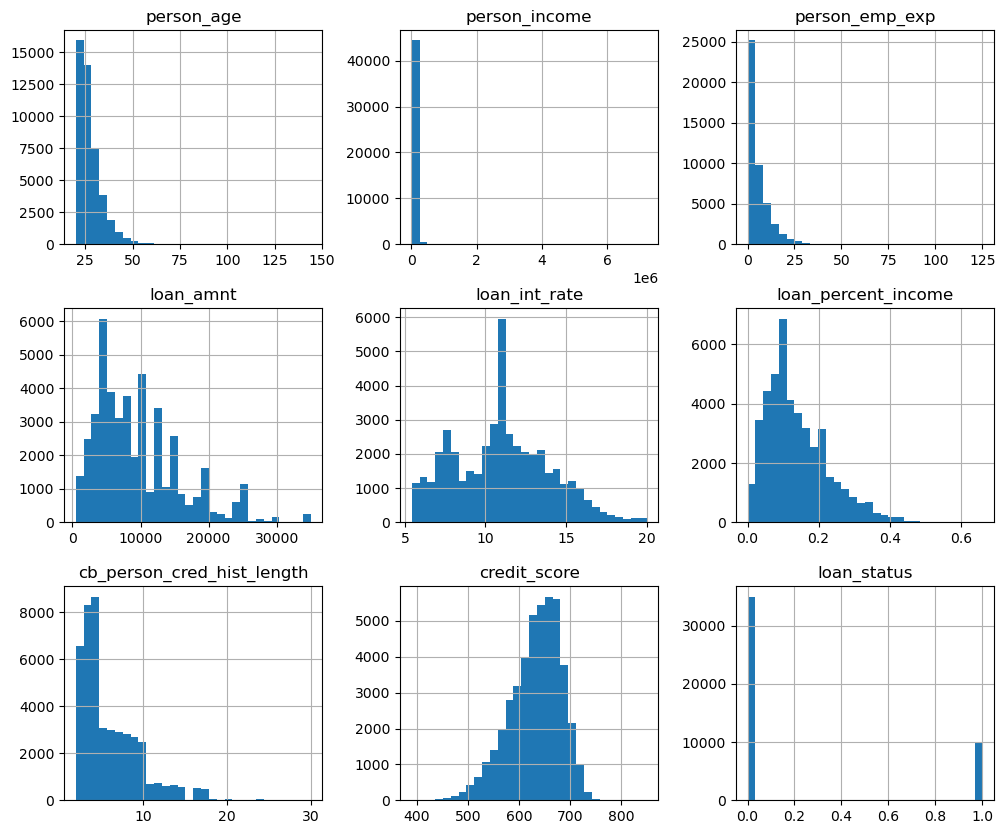

In [129]:
df[numeric_cols].hist(bins=30,figsize=(12,10))
plt.show()

Plotting Target Variable Proportion

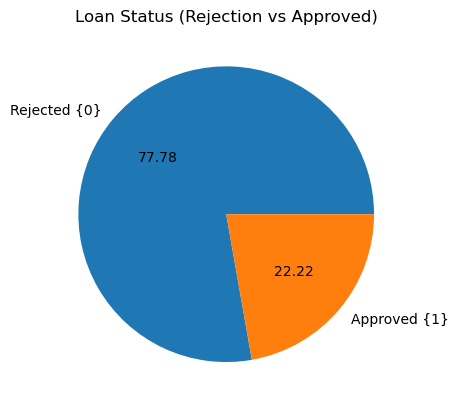

In [130]:
plt.pie(df['loan_status'].value_counts(),labels=['Rejected {0}', 'Approved {1}'],autopct='%.2f')
plt.title("Loan Status (Rejection vs Approved)")
plt.show()

Plotting Boxplot of Numerical columns


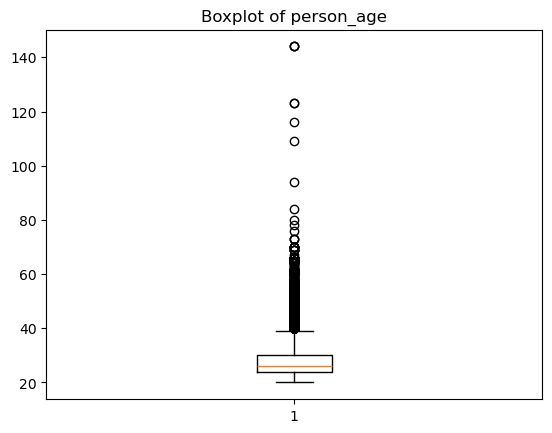

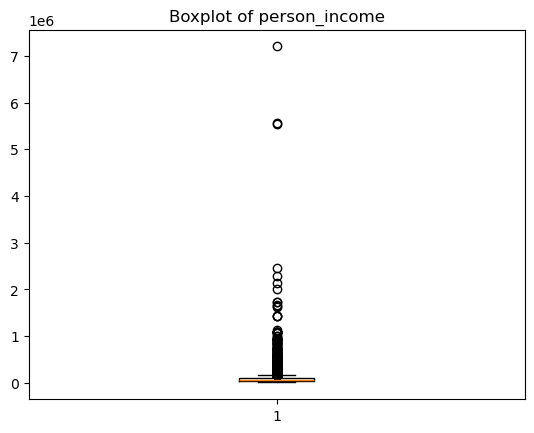

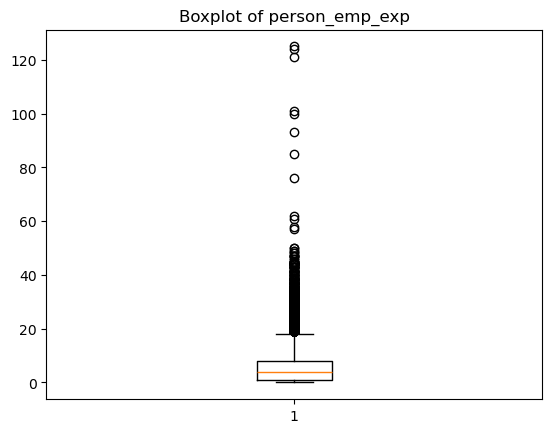

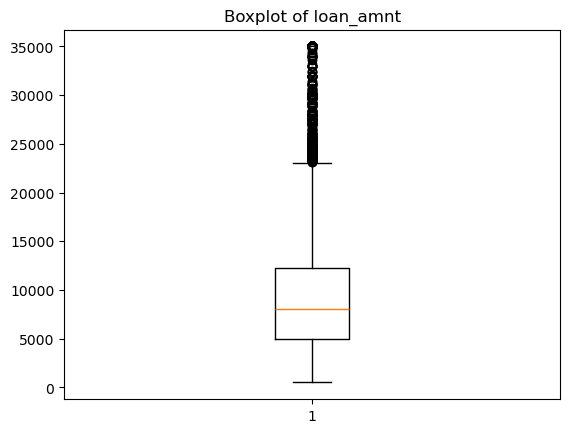

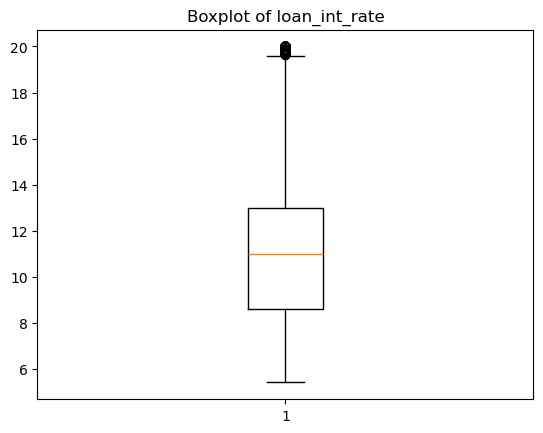

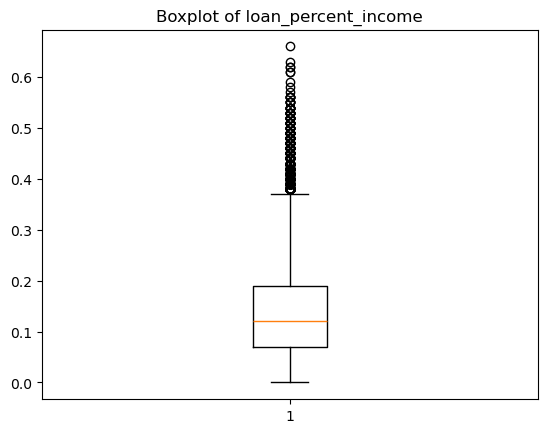

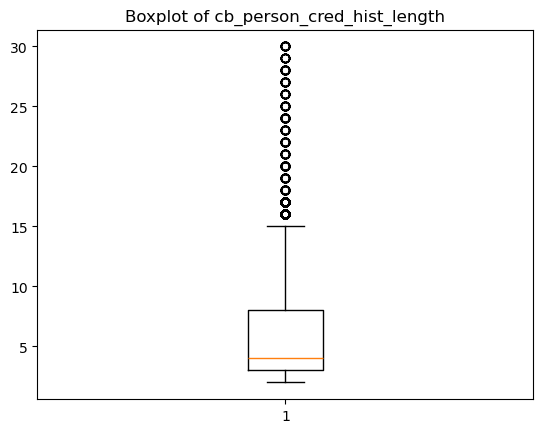

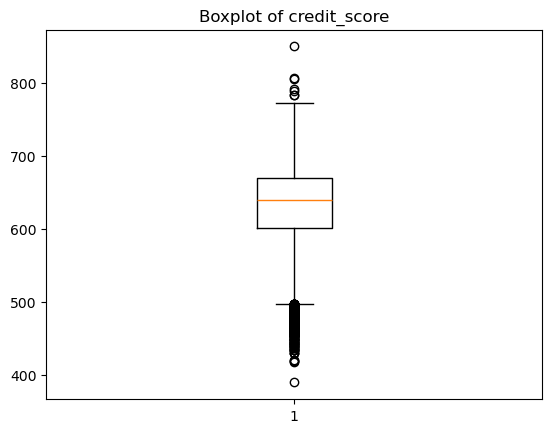

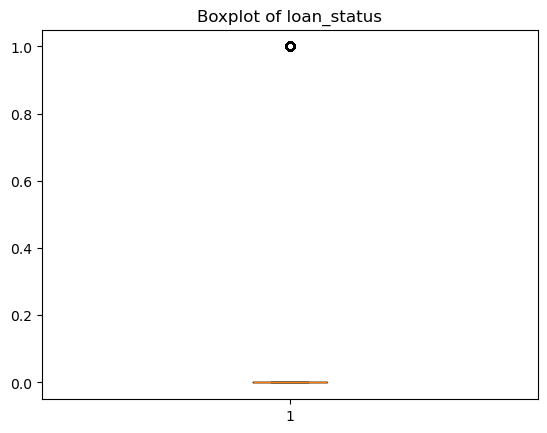

In [131]:
for col in numeric_cols:
    plt.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [132]:
#Skewed and Normal columns based on observations from histogram and bloxplot
skew_cols=['person_age', 'person_income', 'person_emp_exp', 'loan_amnt','loan_percent_income','cb_person_cred_hist_length','credit_score']
norm_cols=['loan_int_rate']

Scaling


In [133]:

#Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ms=MinMaxScaler()
ss=StandardScaler()

df[skew_cols]=ms.fit_transform(df[skew_cols])
df[skew_cols] = ss.fit_transform(df[skew_cols])

df[norm_cols]=ms.fit_transform(df[norm_cols])
df[norm_cols]=ss.fit_transform(df[norm_cols])

In [134]:
#Categorical values before Encoding
for col in categorical_cols:
    print(df[col].unique())

['female' 'male']
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['No' 'Yes']


Encoding Categorical columns

In [135]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    if df[col].dtype==object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])


In [136]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.953538,0,4,-0.104090,-0.892284,3,4.024953,4,1.683039,4.016394,-0.739109,-1.419814,0,1
1,-1.118963,0,3,-0.846005,-0.892284,2,-1.359209,1,0.044782,-0.684829,-0.996863,-2.549975,1,0
2,-0.457264,0,3,-0.844065,-0.397517,0,-0.646600,3,0.625557,3.443074,-0.739109,0.047412,0,1
3,-0.788113,0,1,-0.007039,-0.892284,3,4.024953,3,1.417829,3.443074,-0.996863,0.840507,0,1
4,-0.622689,1,4,-0.176371,-0.727362,3,4.024953,3,1.095549,4.475050,-0.481354,-0.924130,0,1


In [137]:
#Checking null values
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [ ]:
# Outlier Removing using IQR
for col in skew_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(col,Q1,Q3)
    if IQR > 0:
        upper_bound = Q3 + 1.5 * IQR
        df = df[df[col] <= upper_bound]
    else:
        continue

person_age -0.6226885394054379 0.3698605528529767
person_income -0.4145938545262888 0.1811664511032405
person_emp_exp -0.7273619195681237 0.2621713396130588
loan_amnt -0.7257784193091129 0.38272567935654017


loan_percent_income -0.684829399311511 0.4618104891034437
cb_person_cred_hist_length -0.7391085358746027 0.291909981739946
credit_score -0.6663736012439203 0.6818883065700454


In [139]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,-1.118963,0,3,-0.846005,-0.892284,2,-1.359209,1,0.044782,-0.684829,-0.996863,-2.549975,1,0
5,-1.118963,0,3,-0.837686,-0.892284,2,-1.121673,5,-1.298052,0.576474,-0.996863,-1.994808,0,1
9,-1.118963,0,3,-0.840322,-0.892284,2,-1.264195,5,1.253332,-0.111509,-0.739109,0.146549,0,1
19,-0.622689,0,4,-0.821123,-0.727362,0,-1.240441,1,-0.005575,-0.226173,-0.996863,0.919817,0,1
23,-0.622689,0,1,-0.826308,-0.892284,2,-1.280030,4,-1.247696,-0.340837,-0.739109,-0.646546,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44992,-0.788113,0,1,-0.489844,-0.892284,3,-0.092348,4,0.001139,0.920466,-0.481354,-2.887040,0,1
44993,-0.126414,0,3,-0.557152,-0.232595,3,-0.725778,4,1.619254,0.003155,-0.223599,-2.530147,0,1
44995,-0.126414,1,0,-0.402231,0.097249,3,0.857799,3,1.562184,1.952442,-0.739109,0.245686,0,1
44997,0.866135,1,0,-0.290681,0.262171,3,-1.078758,0,-0.331212,-1.028821,1.065174,0.701716,0,1


In [140]:
df.shape

(36325, 14)

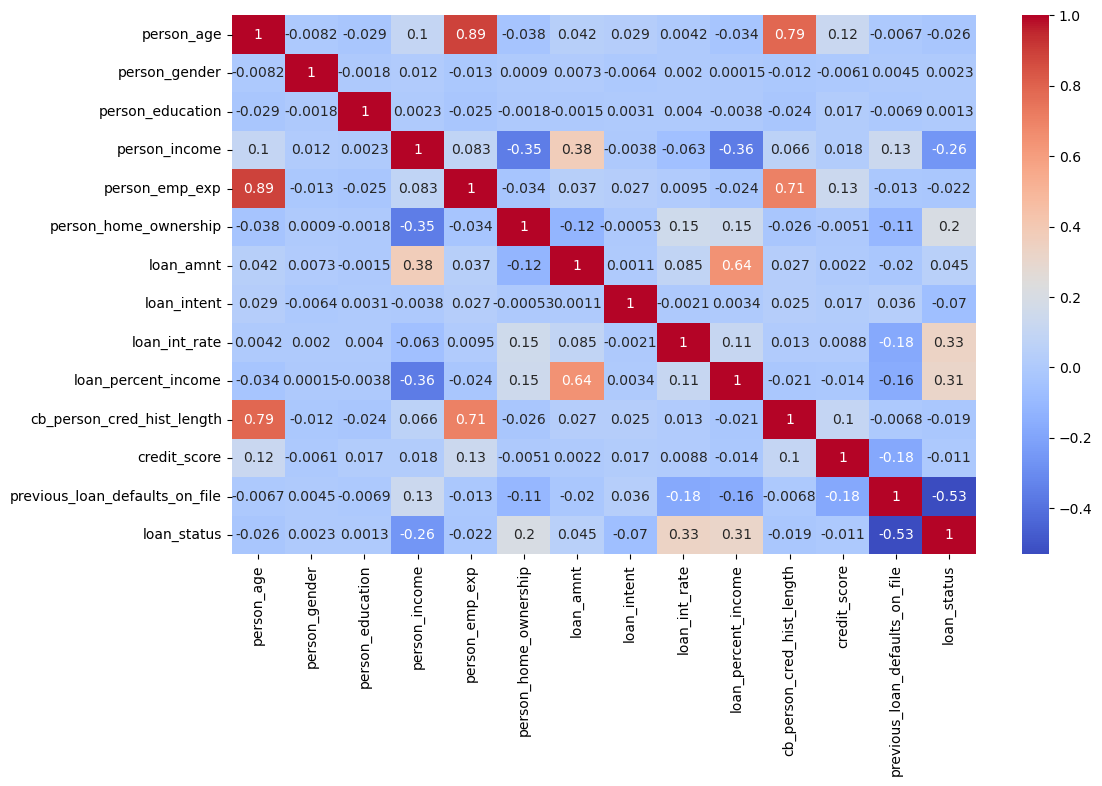

In [141]:
#Correlation matrix
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

 Selecting Features Based on Correlation with Target Variable

In [142]:
#From correlation matrix Important Feature with respect to Loan_status
Req_features=['person_income', 'person_home_ownership', 'loan_int_rate', 'loan_percent_income', 'previous_loan_defaults_on_file']

# x=features and y=Label
x=df[Req_features]
y=df['loan_status']

In [143]:
x

,person_income,person_home_ownership,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file
1,-0.846005,2,0.044782,-0.684829,1
5,-0.837686,2,-1.298052,0.576474,0
9,-0.840322,2,1.253332,-0.111509,0
19,-0.821123,0,-0.005575,-0.226173,0
23,-0.826308,2,-1.247696,-0.340837,1
...,...,...,...,...,...
44992,-0.489844,3,0.001139,0.920466,0
44993,-0.557152,3,1.619254,0.003155,0
44995,-0.402231,3,1.562184,1.952442,0
44997,-0.290681,3,-0.331212,-1.028821,0


 Splitting Data into Training and Testing Sets

In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(29060, 5) (29060,) (7265, 5) (7265,)


In [145]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)


x_train: (29060, 5)
y_train: (29060,)
x_test: (7265, 5)
y_test: (7265,)


In [146]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Logistic Regression Model


In [148]:
LR=LogisticRegression(max_iter=1000,random_state=42)
LR.fit(x_train,y_train)

d:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=42)

In [149]:
LR.score(x_train,y_train)

0.8841362697866483

In [150]:
y_pred=LR.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8783207157604955


K-NearestNeighbors Model

In [151]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

d:\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [152]:
y_pred_knn=knn.predict(x_test)
print(accuracy_score(y_test,y_pred_knn))

0.8897453544390915


In [153]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5789
           1       0.74      0.70      0.72      1476

    accuracy                           0.89      7265
   macro avg       0.83      0.82      0.83      7265
weighted avg       0.89      0.89      0.89      7265



Decision Tree Model

In [154]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [155]:
y_pred_dt=dt.predict(x_test)
print(accuracy_score(y_test,y_pred_dt))

0.8996558843771507


In [156]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5789
           1       0.75      0.76      0.75      1476

    accuracy                           0.90      7265
   macro avg       0.84      0.85      0.85      7265
weighted avg       0.90      0.90      0.90      7265



Random Forest Model

In [157]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

d:\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [158]:
y_pred_rf=rf.predict(x_test)
print(f'Accuracy : {accuracy_score(y_test,y_pred_rf)}')
print(f'Classification Report \n{classification_report(y_test,y_pred_rf)}')

Accuracy : 0.9196145905024088
Classification Report 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5789
           1       0.85      0.74      0.79      1476

    accuracy                           0.92      7265
   macro avg       0.89      0.85      0.87      7265
weighted avg       0.92      0.92      0.92      7265



Heat Map

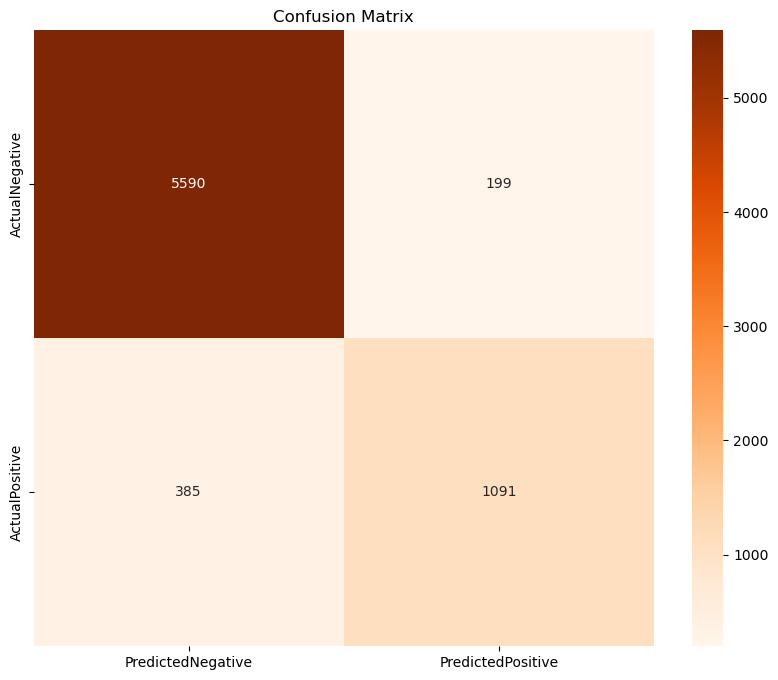

In [159]:
conf_mat=confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Oranges',xticklabels=['PredictedNegative','PredictedPositive'],yticklabels=['ActualNegative','ActualPositive'])
plt.title('Confusion Matrix')
plt.show()